In [1]:
NAME1 = "Caroline Andersson" 
NAME2 = "Adam Burman"
GROUP = "84"

In [3]:
### Check Python version
from platform import python_version_tuple
assert python_version_tuple()[:2] == ('3','9'), "You are not running Python 3.9. Make sure to run Python through the course Conda environment."

### Imports

In [234]:

path = r"C:\Users\carol\deep-machine-learning\project\Dataset"
import torch
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
from pathlib import Path
import torchvision.transforms

from torch import nn
from torch import optim

import matplotlib.pyplot as plt
import numpy as np

### Load Data

Make a dataloader class

In [257]:
from torch.utils.data import Dataset
from itertools import chain
from PIL import Image
import glob
import os

class GTAData(Dataset):
    

    def __init__(self, root, transform = None):
            """Constructor
        
        Args:
            root (Path/str): Filepath to the data root
            transform (Compose): A composition of image transforms.
        """
            root = Path(root)
            if not (root.exists() and root.is_dir()):
                raise ValueError(f"Data root '{root}' is invalid")
            
            self.root = root
            self.transform = transform
            self.img_paths, self.label_paths = self._collect_samples()
            
       
    def __getitem__(self, index):
        """Get sample by index
        
        Args:
            index (int)
        
        Returns:
             The index'th sample Tensor
        """
        
        img_path = self.img_paths[index]
        label_path = self.label_paths[index]

        # Load the image and label into memory
        img = Image.open(img_path)
        label = Image.open(label_path)

        # Perform transforms, if any.
        if self.transform is not None:
            img = self.transform(img)
            label = self.transform(label)

        return img, label
    
    def __len__(self):
        """Get the number of samples in the dataset"""
        return len(self.img_paths)
    
    def _collect_samples(self):
        """Collect all paths and labels
        
        Helper method for the constructor
        """
        """Collect all paths and labels

        Helper method for the constructor
        """
        
        
        # Get image and label paths
        img_dir = self.root / "01_images" / "images"
        label_dir = self.root / "01_labels" / "labels"
        
        # check if there are images in the directory
        #self._check_images_in_directory(img_dir)
        #self._check_images_in_directory(label_dir)

        img_paths = list(img_dir.glob("*.png"))
        label_paths = list(label_dir.glob("*.png"))

        if len(img_paths) != len(label_paths):
            raise ValueError("Number of images and labels must be the same")
            
        return img_paths, label_paths


In [258]:
from torchvision.transforms import Compose
transform = Compose([ToTensor()])

example_dataset = GTAData(path, transform)
print(len(example_dataset)) #1
img, label = example_dataset[2]
print(img)

2500
tensor([[[0.8118, 0.8118, 0.8118,  ..., 0.8549, 0.8549, 0.8549],
         [0.8118, 0.8118, 0.8118,  ..., 0.8549, 0.8549, 0.8549],
         [0.8078, 0.8078, 0.8078,  ..., 0.8549, 0.8549, 0.8549],
         ...,
         [0.8353, 0.8392, 0.8431,  ..., 0.5255, 0.5216, 0.5216],
         [0.8353, 0.8392, 0.8510,  ..., 0.5255, 0.5255, 0.5255],
         [0.8353, 0.8471, 0.8549,  ..., 0.5373, 0.5333, 0.5333]],

        [[0.8431, 0.8431, 0.8431,  ..., 0.8627, 0.8627, 0.8627],
         [0.8431, 0.8431, 0.8431,  ..., 0.8627, 0.8627, 0.8627],
         [0.8431, 0.8431, 0.8431,  ..., 0.8627, 0.8627, 0.8627],
         ...,
         [0.7843, 0.7882, 0.7922,  ..., 0.5373, 0.5333, 0.5333],
         [0.7804, 0.7843, 0.8000,  ..., 0.5373, 0.5373, 0.5373],
         [0.7843, 0.7961, 0.8078,  ..., 0.5490, 0.5451, 0.5451]],

        [[0.8745, 0.8745, 0.8745,  ..., 0.8745, 0.8745, 0.8745],
         [0.8745, 0.8745, 0.8745,  ..., 0.8745, 0.8745, 0.8745],
         [0.8745, 0.8745, 0.8745,  ..., 0.8745, 0.874

### Display Images

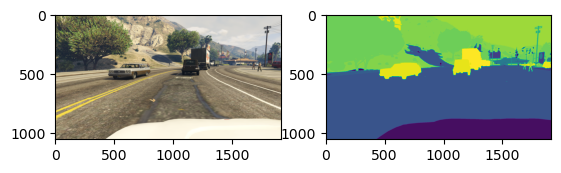

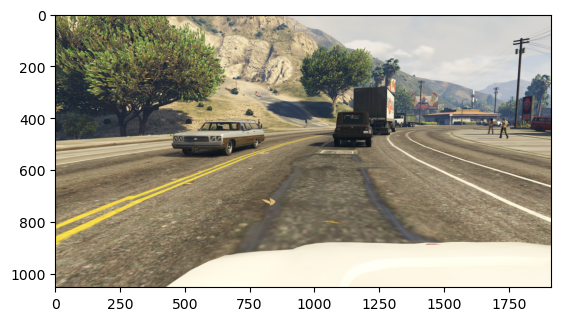

In [260]:
def display_image(image_tensor, label_tensor = torch.empty(0,1)):
    """Display a tensor as an image
    
    Args:
        axis (pyplot axis)
        image_tensor (torch.Tensor): tensor with shape (num_channels=3, width, heigth)
    """
    
    # See hint above
    if not isinstance(image_tensor, torch.Tensor):
        raise TypeError("The `display_image` function expects a `torch.Tensor` " +
                        "use the `ToTensor` transformation to convert the images to tensors.")
        
    if label_tensor.numel() != 0:
        _, axis = plt.subplots(1, 2)
        
        image_data = image_tensor.permute(1, 2, 0).numpy()
        height, width, _ = image_data.shape
        axis[0].imshow(image_data)
        axis[0].set_xlim(0, width)
        axis[0].set_ylim(height, 0)
        
        label_data = label_tensor.permute(1, 2, 0).numpy()
        height, width, _ = label_data.shape
        axis[1].imshow(label_data)
        axis[1].set_xlim(0, width)
        axis[1].set_ylim(height, 0)
        
    else:
        
        _, axis = plt.subplots()
        
        
        image_data = image_tensor.permute(1, 2, 0).numpy()
        height, width, _ = image_data.shape
        axis.imshow(image_data)
        axis.set_xlim(0, width)
        # By convention when working with images, the origin is at the top left corner.
        # Therefore, we switch the order of the y limits.
        axis.set_ylim(height, 0)

# Example usage
#_, axis = plt.subplots(1, 2)
some_random_index = 452


image_tensor, label_tensor = example_dataset[some_random_index]
display_image(image_tensor, label_tensor) # call on both original image and label
display_image(image_tensor) # call only image

### Augument and Normalize Data

tensor([])


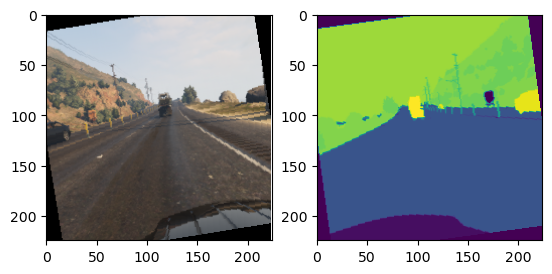

In [261]:
import torchvision.transforms as transforms
#import colorspacious as cs

from torchvision.transforms import RandomGrayscale, ColorJitter, RandomHorizontalFlip, Resize, Normalize, RandomRotation
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
resize_size = 224
# transform img_tensor

# ToTensor scales data between [0, 1] which is needed later
transform_data = Compose([ToTensor(), Resize((resize_size, resize_size), antialias=True), 
                          Normalize(0, 1, inplace=False), RandomHorizontalFlip(), RandomRotation(15)])
img_dataset_transform = GTAData(path, transform_data)

# display an augumented and normalized image
test_image, test_label = img_dataset_transform[54]
display_image(test_image, test_label) # obs! has to do the same thing on label and image!


'''
resize_size = 224
pixelValues = []
channelMean = [0.0, 0.0, 0.0]
channelSTD = [0.0, 0.0, 0.0]
for image,_ in example_dataset:
    imgArray = np.array(image)
    for channel in range(3):
        channelMean[channel] += np.mean(imgArray[channel,:,:])
        channelSTD[channel] += np.std(imgArray[channel,:,:])

numberOfSamples = len(example_dataset)
channelMean = [m / numberOfSamples for m in channelMean]
channelSTD = [s / numberOfSamples for s in channelSTD]
print(channelMean[0:3])

data_transforms = transforms.Compose([transforms.RandomHorizontalFlip(), 
                                      transforms.RandomRotation(15),
                                      transforms.Normalize(channelMean, channeSTD, inplace=False),
                                      transforms.ToTensor()])
'''
print(test_image[test_image<0]) # check for negative values since all must be between 0 and 1 
#(div by 255 automatically in ToTensor())

### reformat RGB --> Lab where L = X, a,b = Y

In [216]:
from PIL import ImageCms
import kornia # https://kornia.readthedocs.io/en/latest/color.html

class ColorTrans:

    '''Class for transforming RGB<->LAB color spaces for PIL images.'''
    
    def __init__(self):
        self.srgb_p = ImageCms.createProfile("sRGB")
        self.lab_p  = ImageCms.createProfile("LAB")
        self.rgb2lab_trans = ImageCms.buildTransformFromOpenProfiles(srgb_p, lab_p, "RGB", "LAB")
        self.lab2rgb_trans = ImageCms.buildTransformFromOpenProfiles(lab_p, srgb_p, "LAB", "RGB")
    
    def rgb2lab(self, img):
        return ImageCms.applyTransform(img, self.rgb2lab_trans)

    def lab2rgb(self, img):
        return ImageCms.applyTransform(img, self.lab2rgb_trans)

In [272]:
#Lab color is computed using the D65 illuminant and Observer 2. (deafult in kornia)
my_tensor = kornia.color.rgb_to_lab(test_image) # the test image is assumed to be in range (0,1) 
#display_image(my_tensor[1:2, :, :])
#display_image(my_tensor[:,:,:])
L=my_tensor.numpy()[0]
a=my_tensor.numpy()[1]
b=my_tensor.numpy()[2]
display_image(L)
display_image(a,b)
print(torch.max(b))
plt.imshow(my_tensor.numpy()[2])
plt.show()
# in the opposite direction L is in range [0, 100], a,b is in range [-128, 127]

TypeError: The `display_image` function expects a `torch.Tensor` use the `ToTensor` transformation to convert the images to tensors.

###  Create Autoenconder
vgg16 can be used as the encoder by using transfer learning with the gtaV images. Then a decoder has to be constructed from scratch to generate a new image.